# CAPSTONE PROJECT- LOAN DEFAULT PREDICTION

**Business Question-"How can we accurately predict loan defaults to minimize the risk exposure of our financial institution and improve the quality of lending decisions?’’.**



**INTRODUCTION-In this project of "Loan Default Prediction." we will explore the application of machine learning techniques to predict loan defaults and improve risk assessment in the financial industry.
By collecting the past data on the loan borrowers & would like you to develop a strong ML Model to classify if any new borrower is likely to default or not.**

**Objectives:
The primary objectives of this project are as follows:
1)Build a robust predictive model to identify customers who are at a higher risk of defaulting on their loans.
2)Enhance the accuracy of loan default predictions to aid lenders in making well-informed lending decisions.**


# Importing the libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import re

seed = 1234

# Importing the Data

In [2]:
# Load the CSV file and convert column names to lowercase
df = pd.read_csv('Loan_Default.csv', header=0)
df.columns = df.columns.str.lower()
df.head(10)

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,...,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0
7,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,...,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
8,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CIB,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0
9,24899,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,...,CIB,788,EXP,55-64,to_inst,63.444767,south,direct,0,30.0


In [3]:
df.drop(columns=['id','year'], inplace=True) #drop the "id" and "year" which are irrelevant

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   credit_worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           112231 non-null  float64
 10  interest_rate_spread       112031 non-null  float64
 11  upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  neg_ammortization          14

In [5]:
df.shape #shape of the dataset

(148670, 32)

In [6]:
df.dtypes #Dataset types such as 'object', 'float' and 'integer'

loan_limit                    object
gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
credit_worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
interest_rate_spread         float64
upfront_charges              float64
term                         float64
neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
secured_by                    object
total_units                   object
income                       float64
credit_type                   object
credit_score                   int64
co-applicant_credit_type      object
age                           object
submission_of_application     object
l

In [7]:
df.describe()

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1
count,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [8]:
df.isnull().sum()  # Check count of missing values in each column

loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
ltv                          15098
region              

# EDA

**Distrribution of the status column**

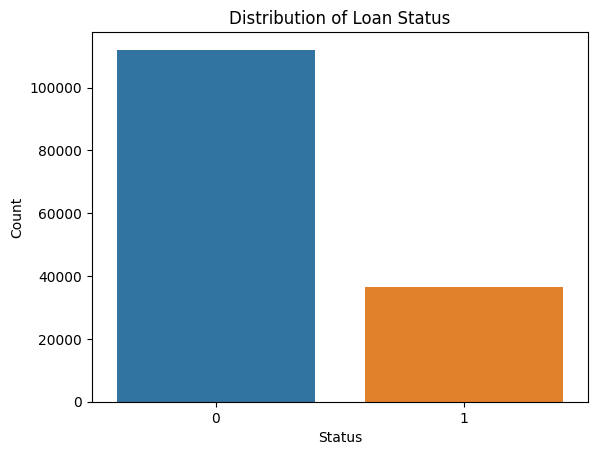

In [9]:
# Explore the distribution of the target variable 'status'
sns.countplot(x='status', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [43]:
df['status'].value_counts()

status
0.0    112031
1.0     36639
Name: count, dtype: int64

**EDA on Numerical Columns**

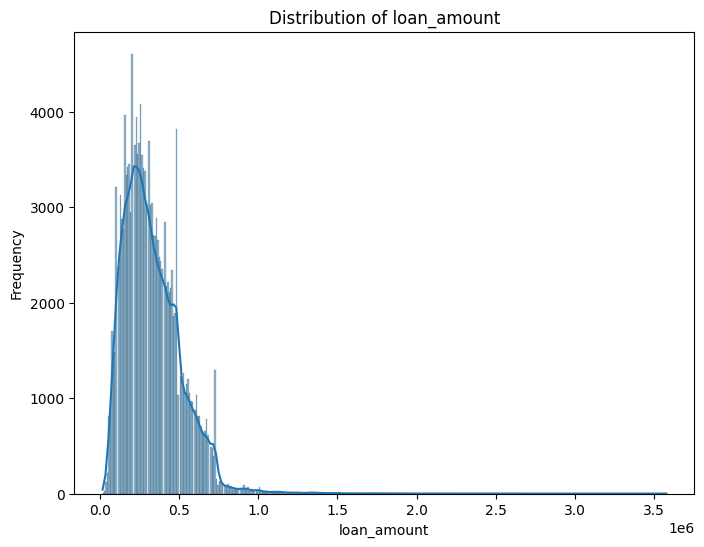

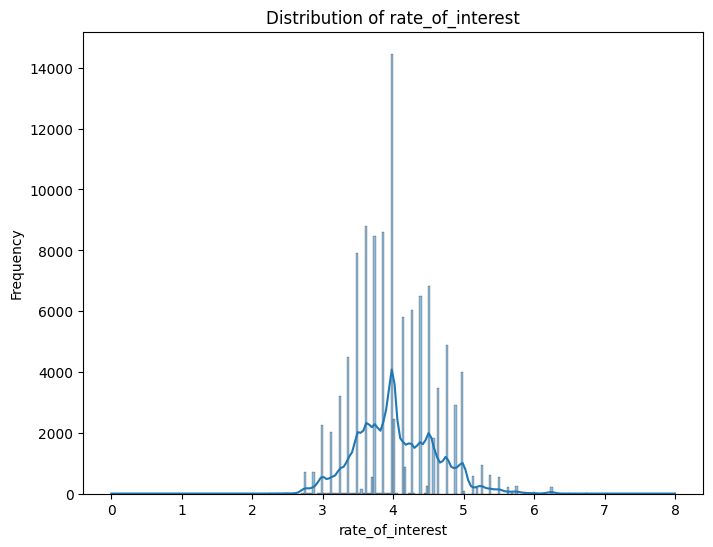

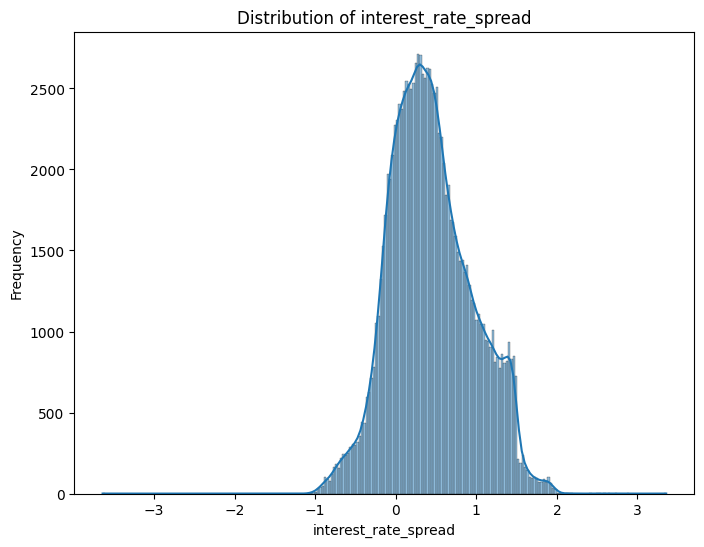

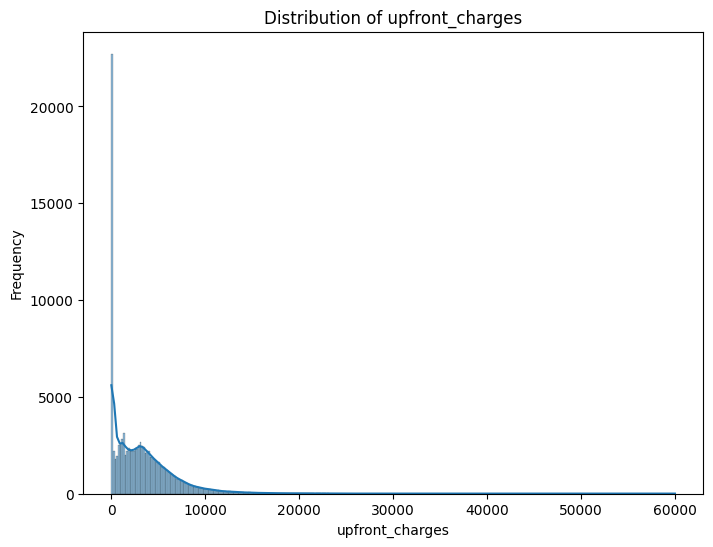

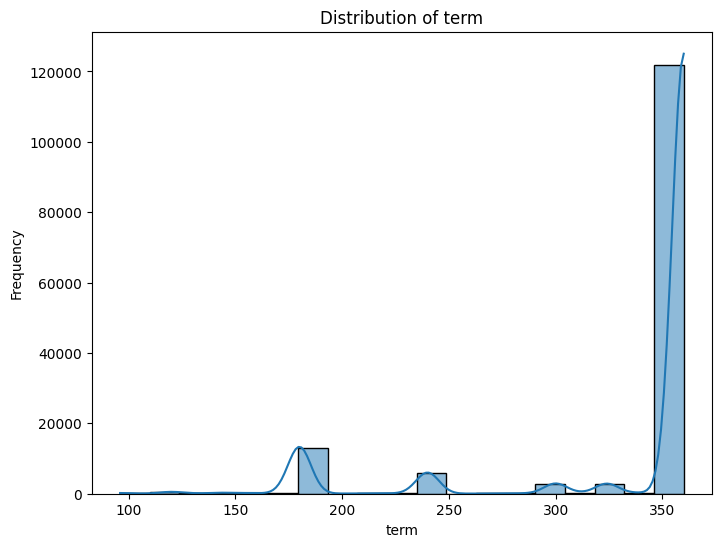

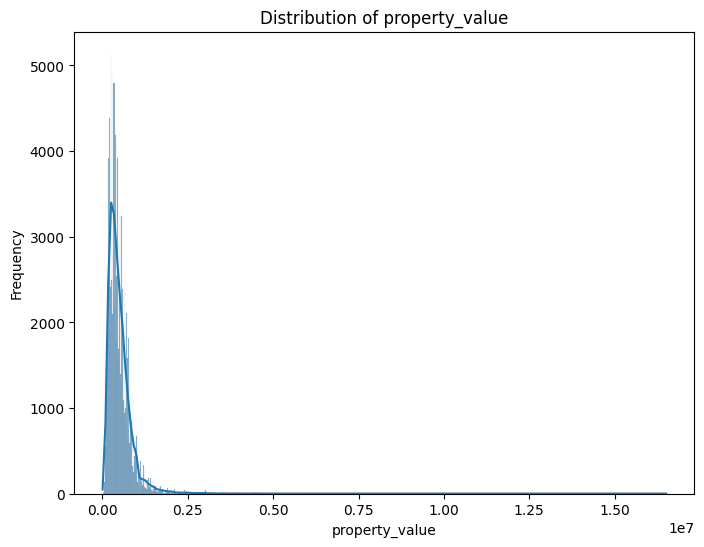

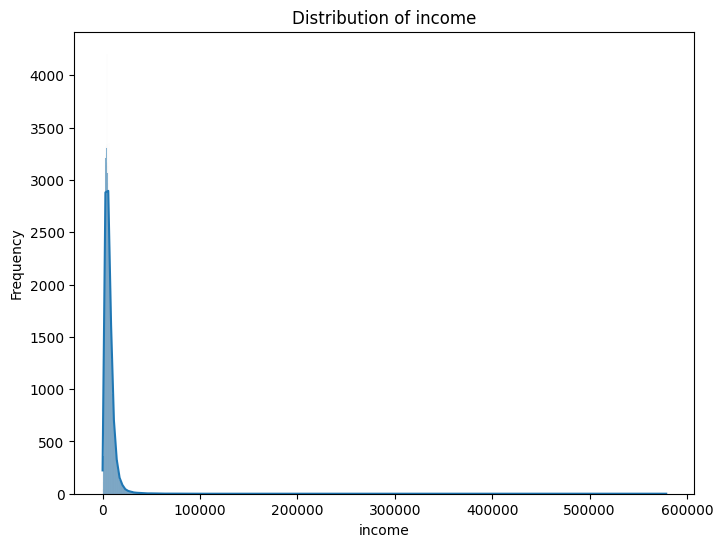

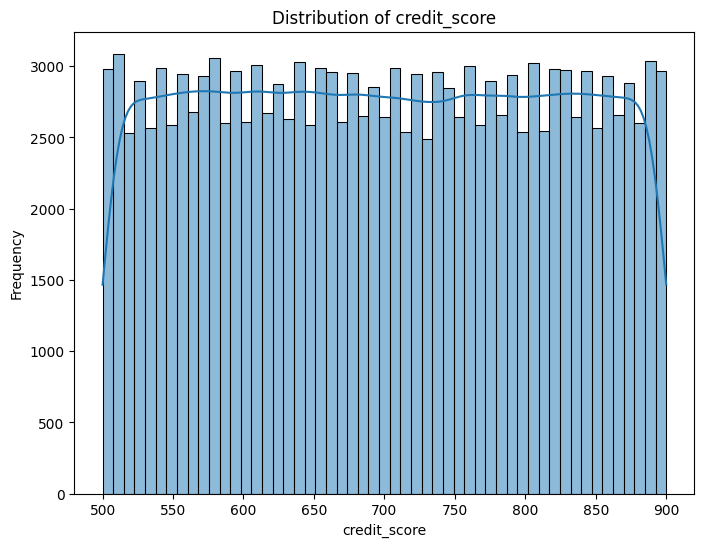

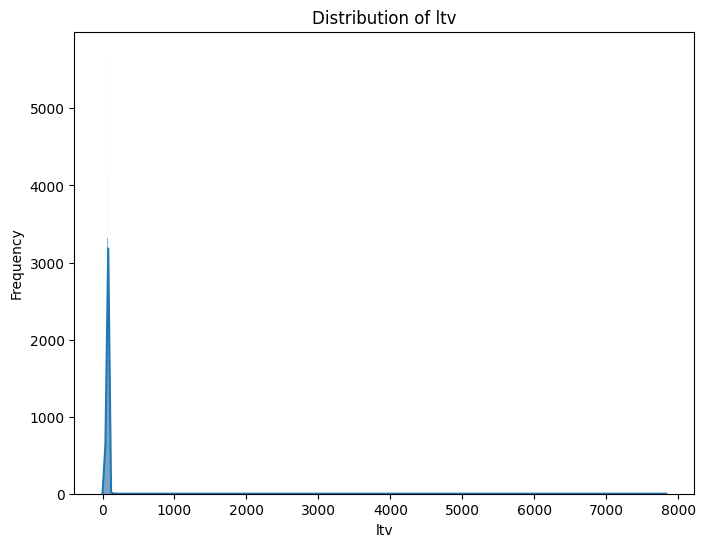

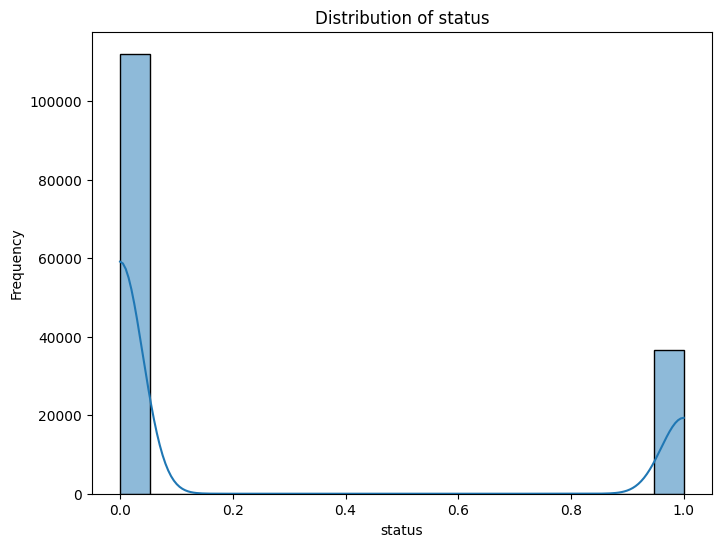

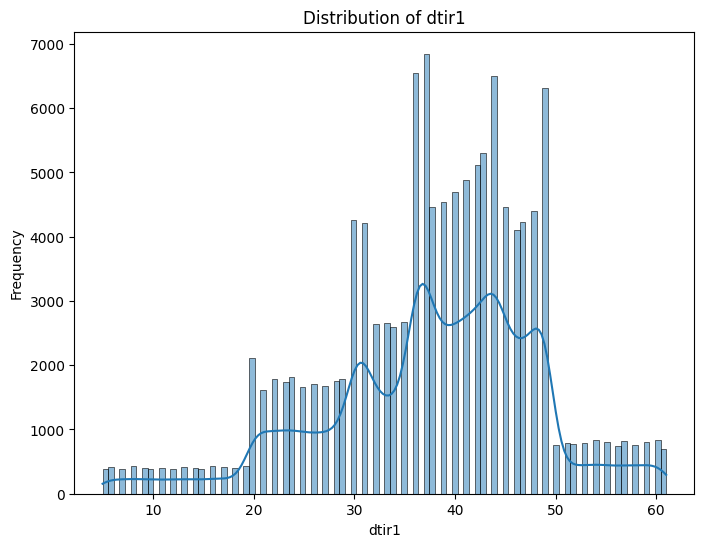

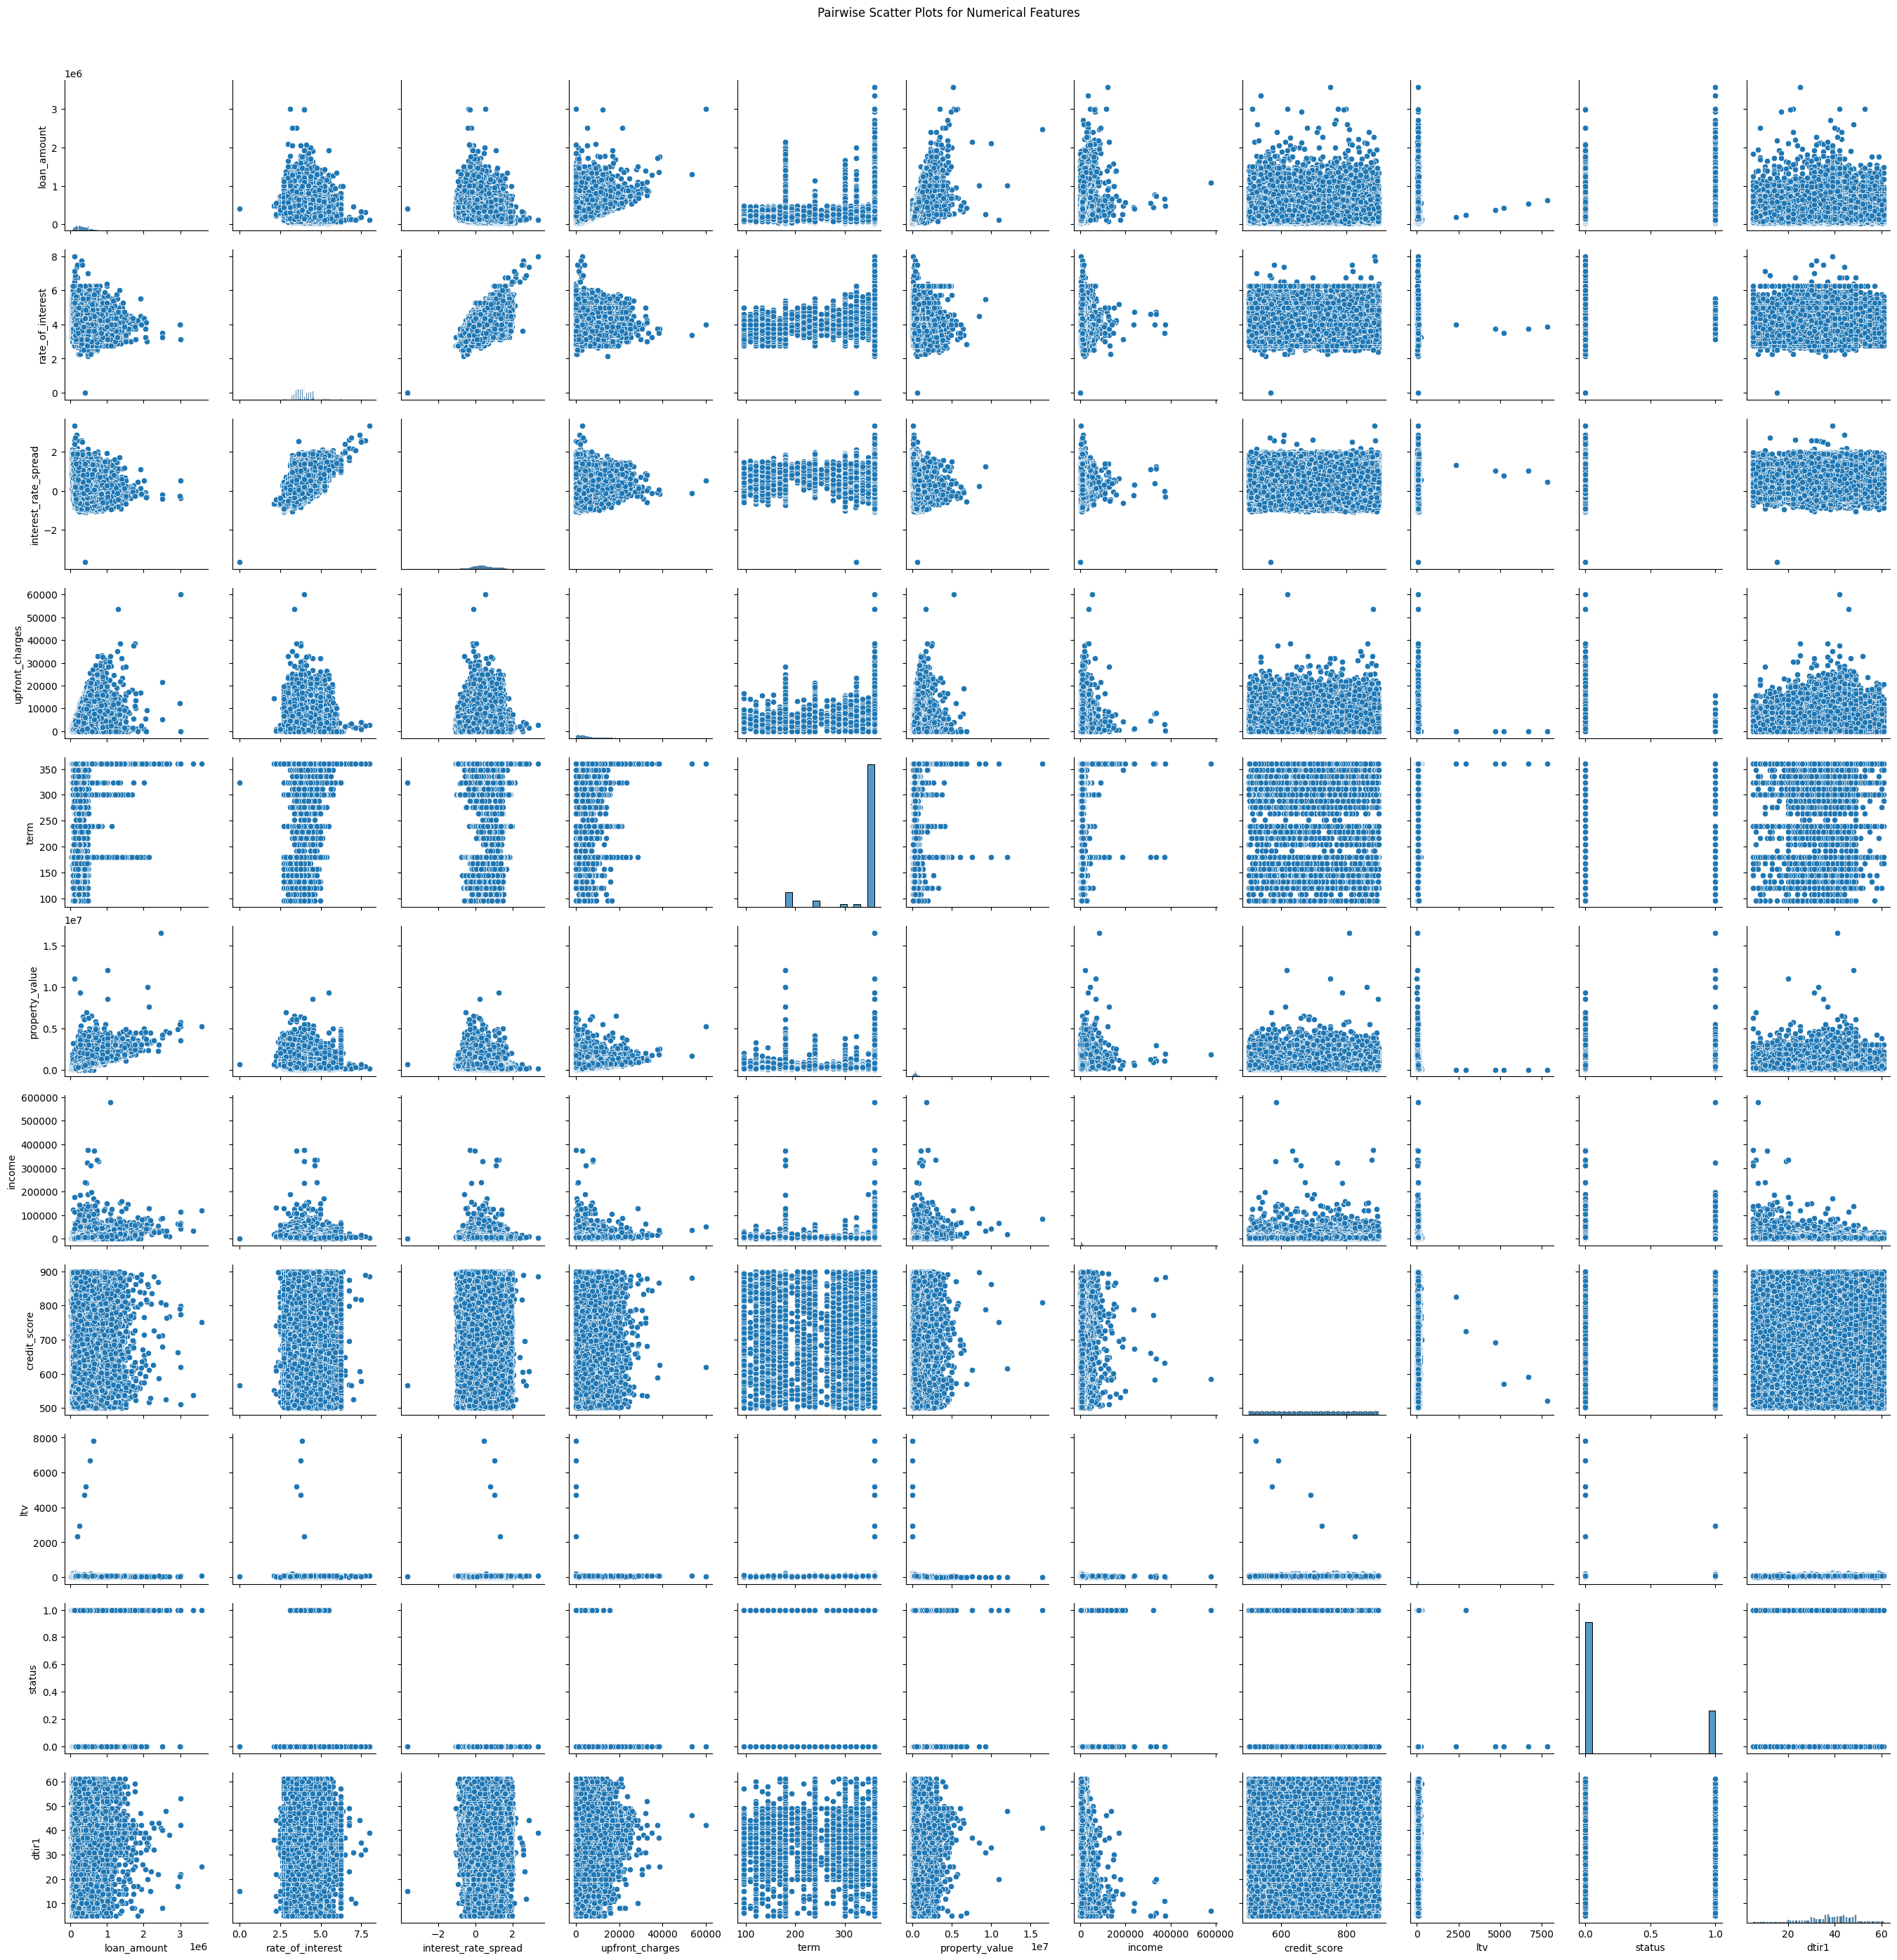

In [10]:
# EDA on Numerical Columns
numerical_cols = df.select_dtypes(include='number').columns

# Distribution of numerical features
for feature in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Pairwise scatter plots for numerical features
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairwise Scatter Plots for Numerical Features', y=1.02)
plt.show()

**EDA on Categorical Columns**

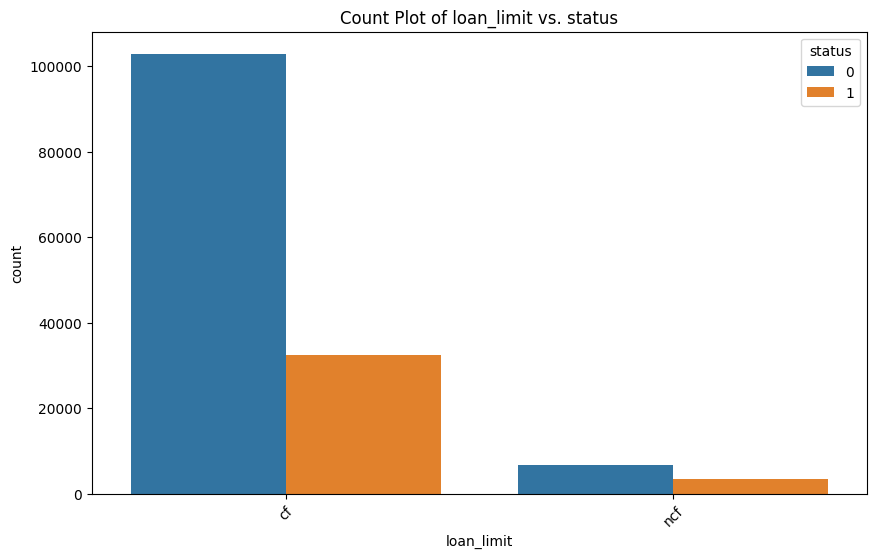

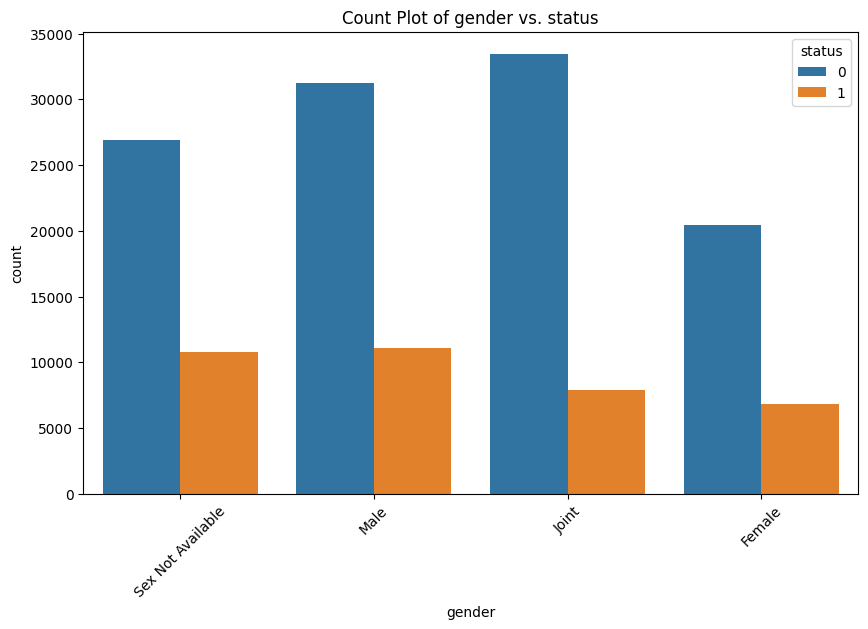

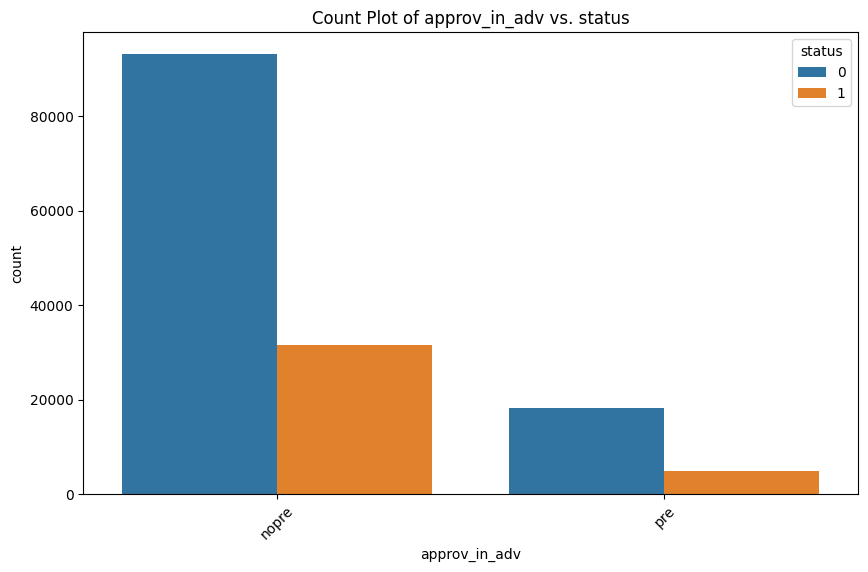

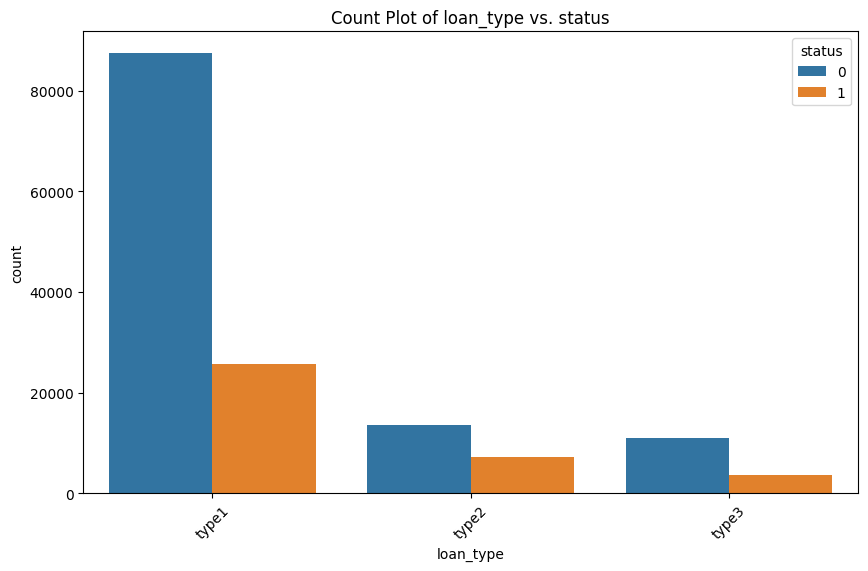

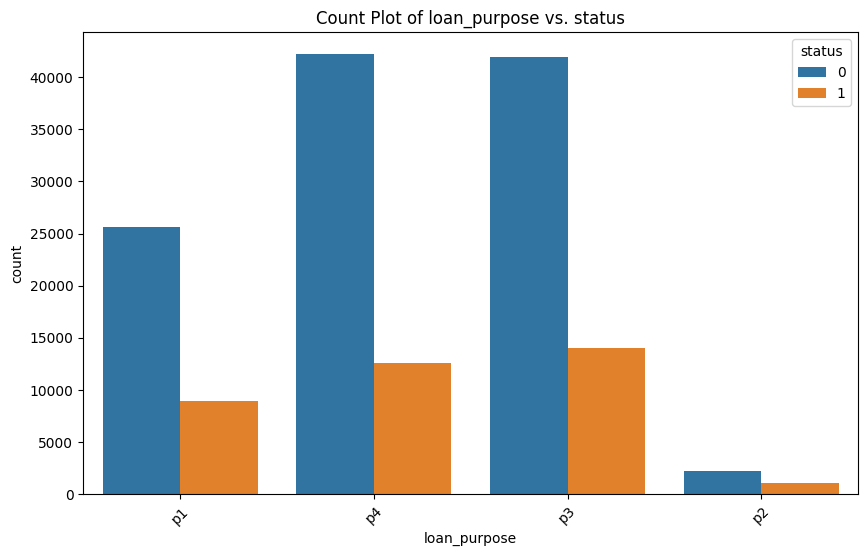

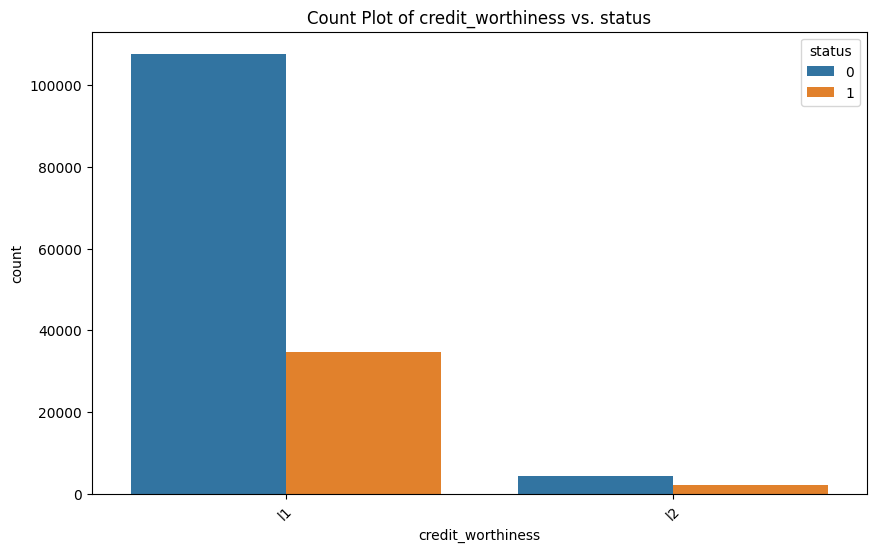

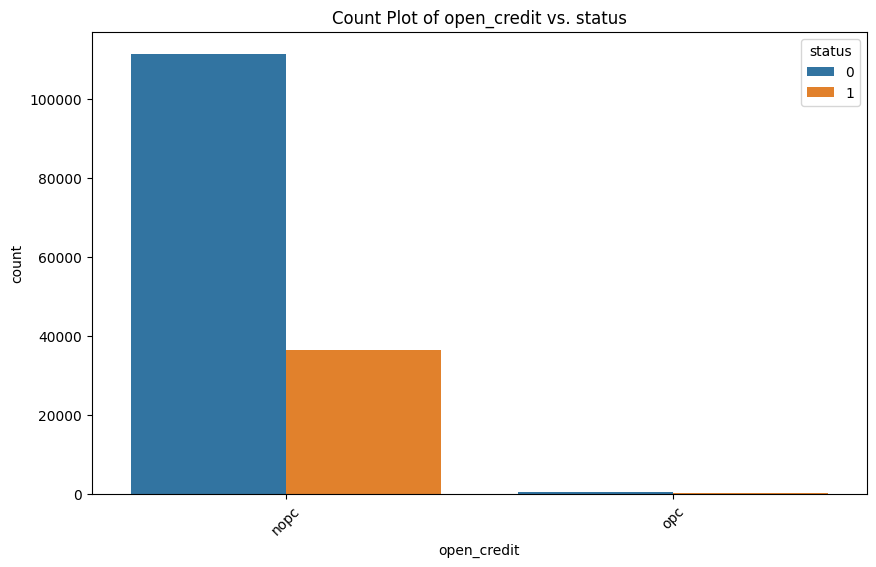

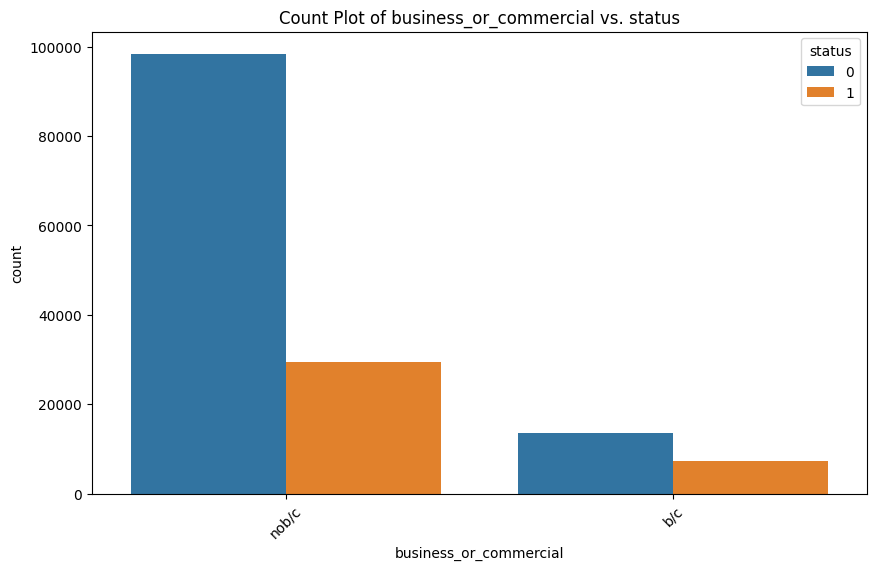

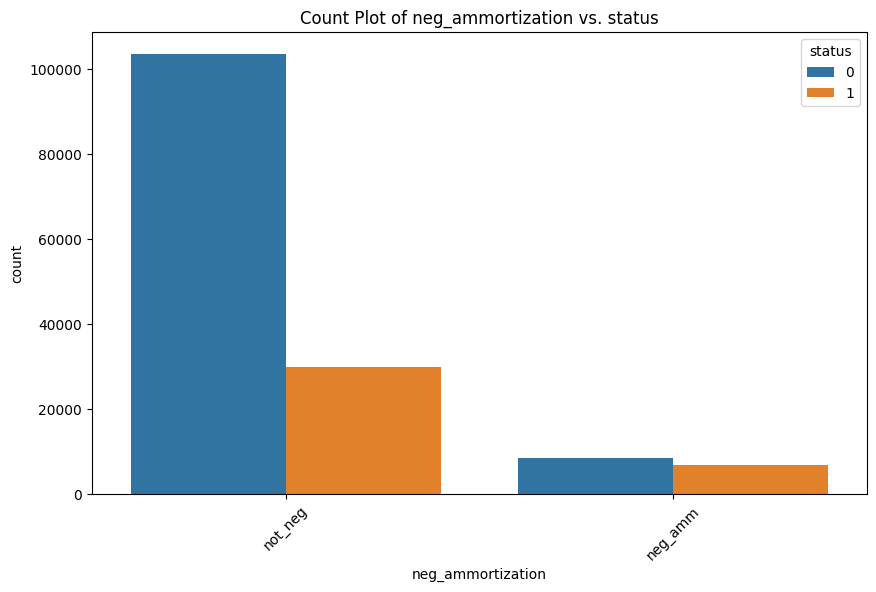

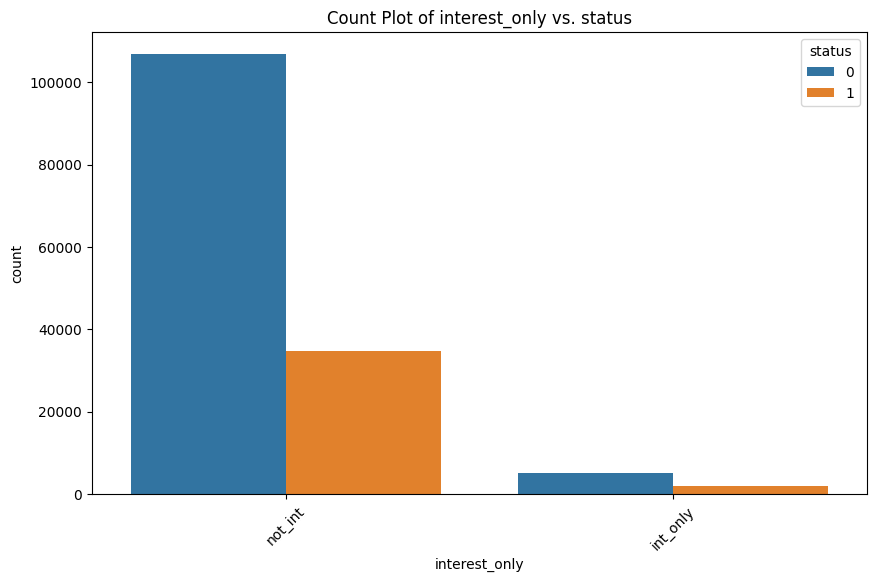

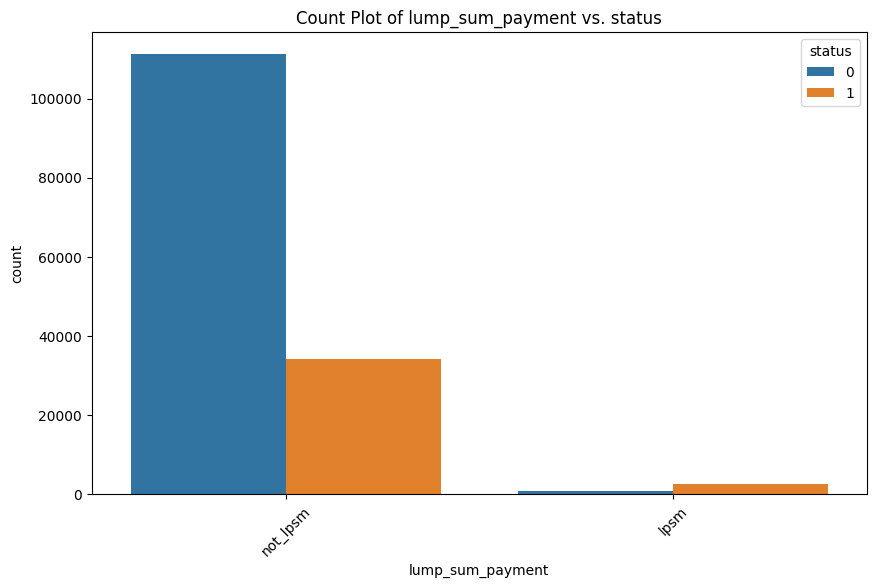

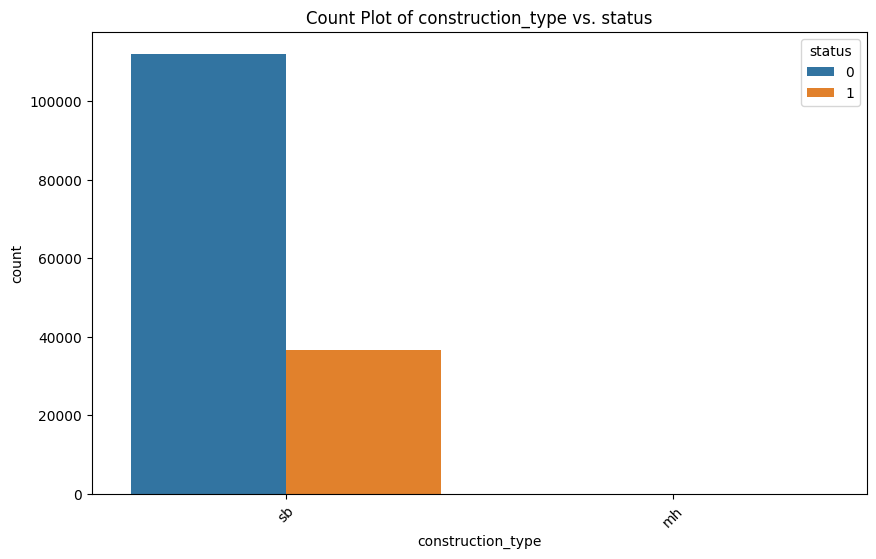

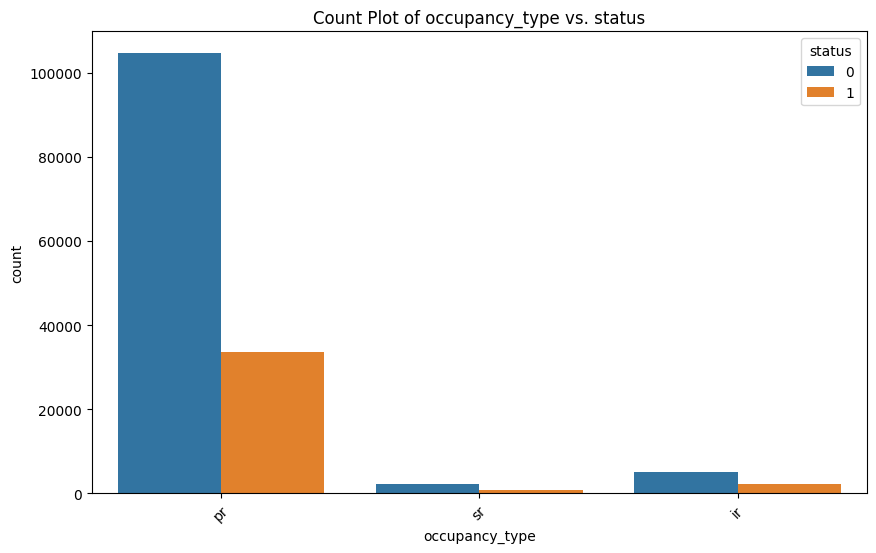

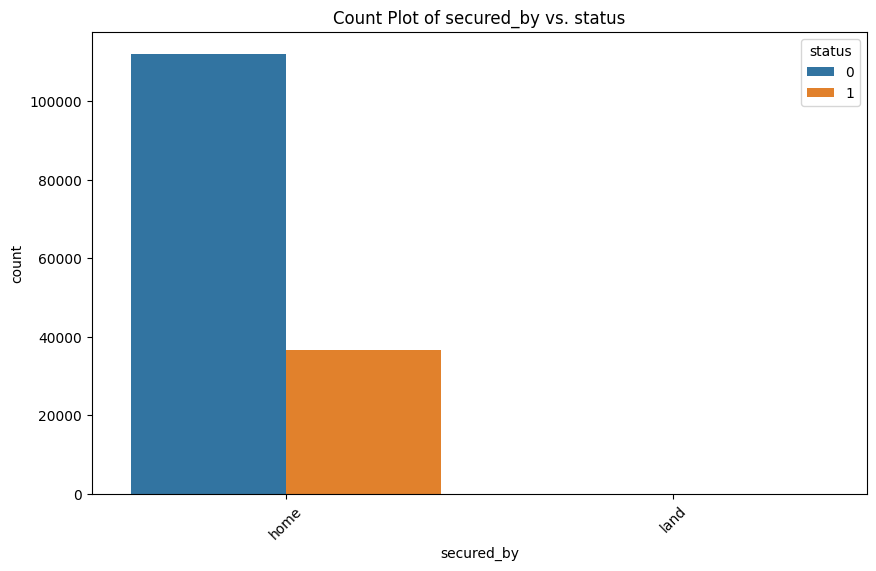

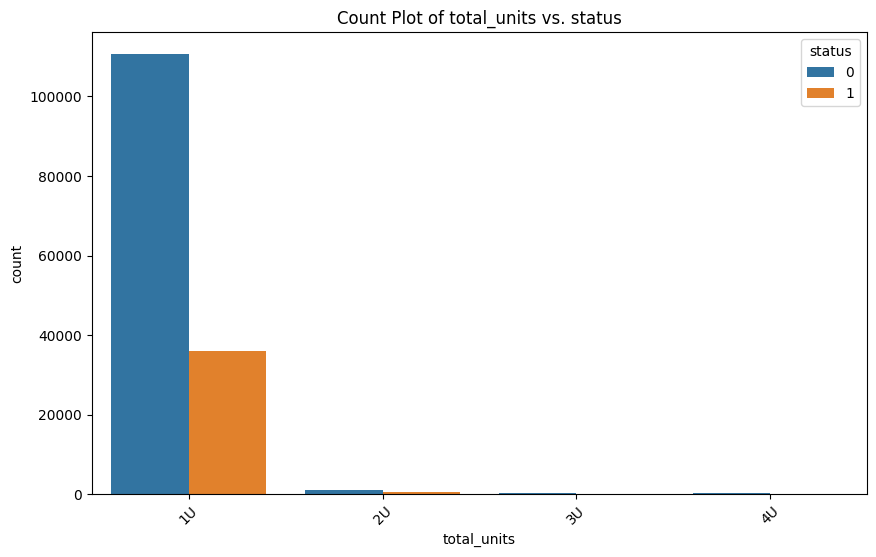

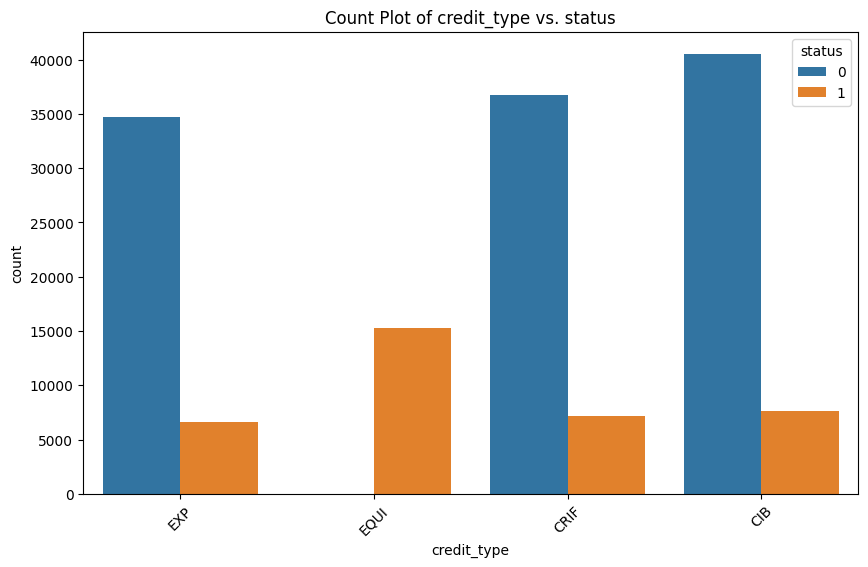

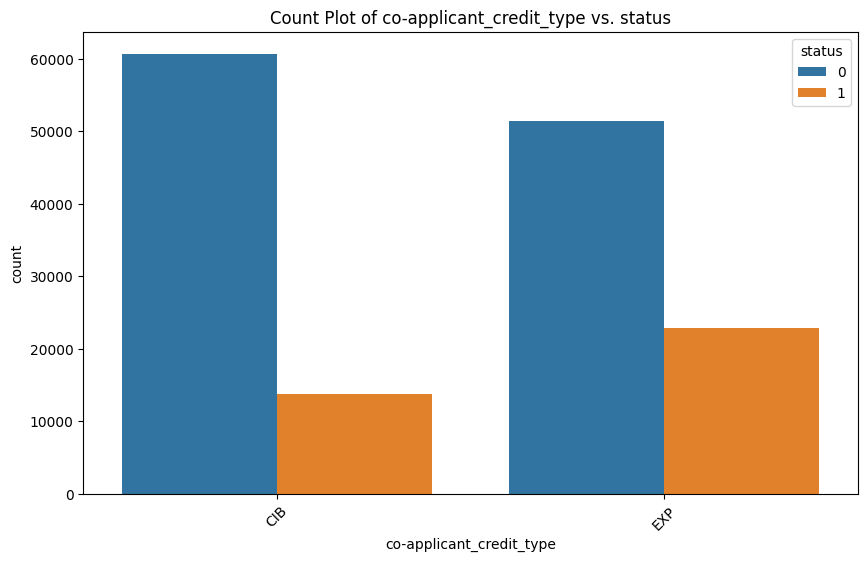

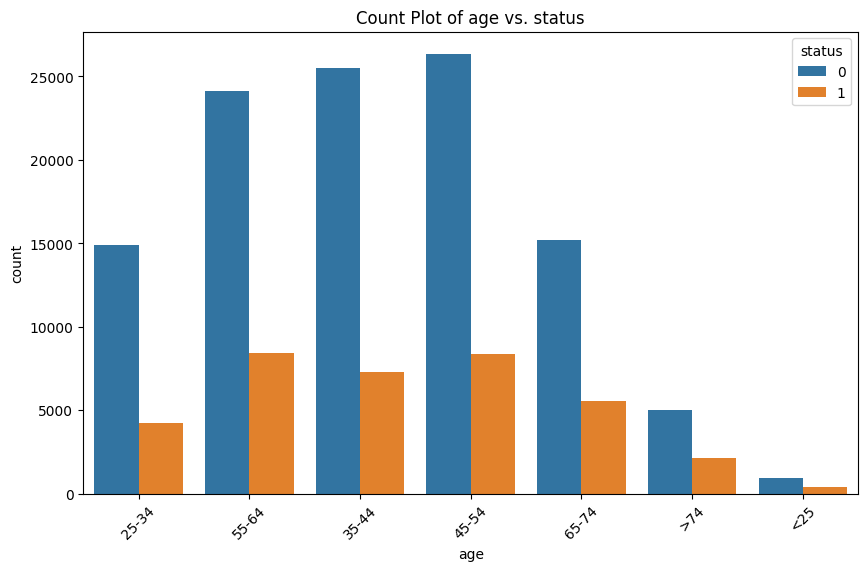

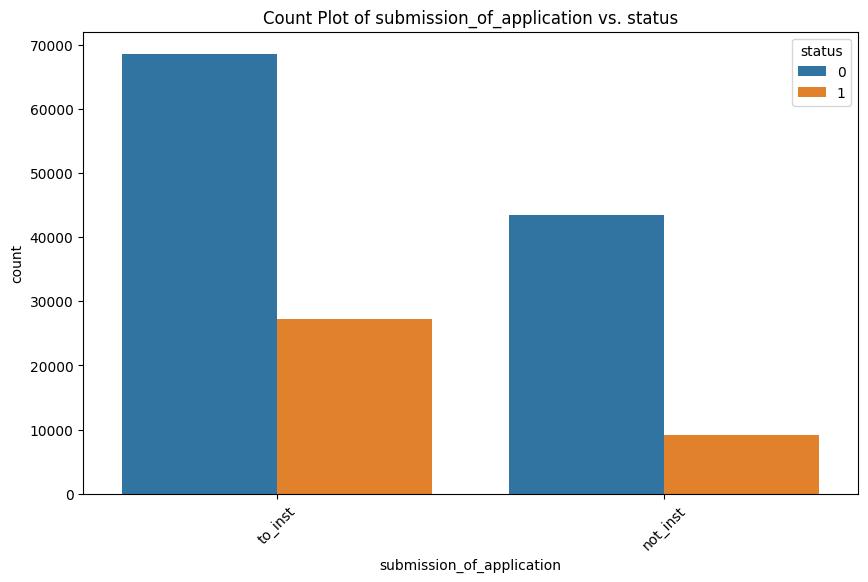

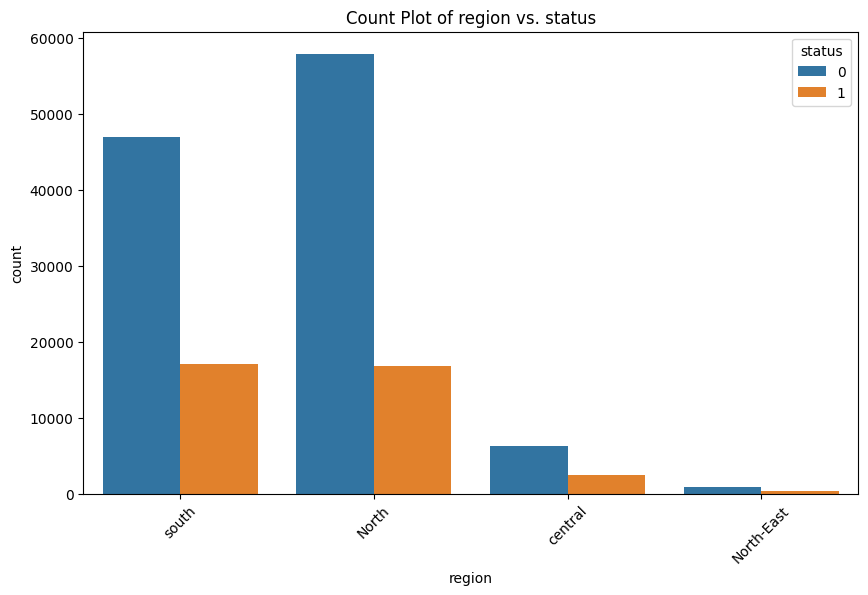

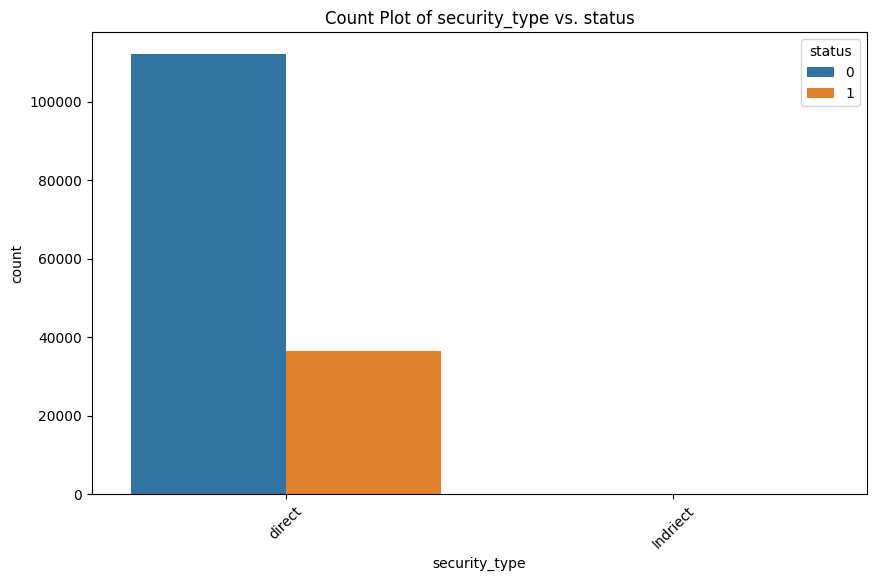

In [11]:
# Select only the categorical columns from the DataFrame
categorical_columns = df.select_dtypes(include='object')

# Replace 'target_column' with the actual name of your target column ('status')
target_column = 'status'

# Loop through each categorical column and create count plots with hue as the target column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue=target_column, data=df)
    plt.title(f'Count Plot of {column} vs. {target_column}')
    plt.xticks(rotation=45)
    plt.show()

**KNN Imputer for nulls in numercal columns**

In [12]:
from sklearn.impute import KNNImputer
# Select only the numerical columns for imputation
numerical_cols = df.select_dtypes(include='number').columns
df_numerical = df[numerical_cols]

# Impute missing values using KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # You can change the value of n_neighbors as needed
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_numerical), columns=numerical_cols)

# Replace the imputed numerical columns in the original DataFrame
df[numerical_cols] = df_imputed[numerical_cols]

In [13]:
df[numerical_cols].isnull().sum() #checking the nulls

loan_amount             0
rate_of_interest        0
interest_rate_spread    0
upfront_charges         0
term                    0
property_value          0
income                  0
credit_score            0
ltv                     0
status                  0
dtir1                   0
dtype: int64

In [14]:
# Check if there are any missing values remaining after imputation
print(df.isnull().sum())

loan_limit                   3344
gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
credit_worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest                0
interest_rate_spread            0
upfront_charges                 0
term                            0
neg_ammortization             121
interest_only                   0
lump_sum_payment                0
property_value                  0
construction_type               0
occupancy_type                  0
secured_by                      0
total_units                     0
income                          0
credit_type                     0
credit_score                    0
co-applicant_credit_type        0
age                           200
submission_of_application     200
ltv                             0
region                          0
security_type 

In [15]:
from sklearn.impute import KNNImputer, SimpleImputer
categorical_cols = df.select_dtypes(include='object').columns
# Impute missing values for categorical columns using SimpleImputer with 'most_frequent' strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])
print(df.isnull().sum())

loan_limit                   0
gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
credit_worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
interest_rate_spread         0
upfront_charges              0
term                         0
neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
secured_by                   0
total_units                  0
income                       0
credit_type                  0
credit_score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
ltv                          0
region                       0
security_type                0
status                       0
dtir1                        0
dtype: i

**Corrolation Heatmap**

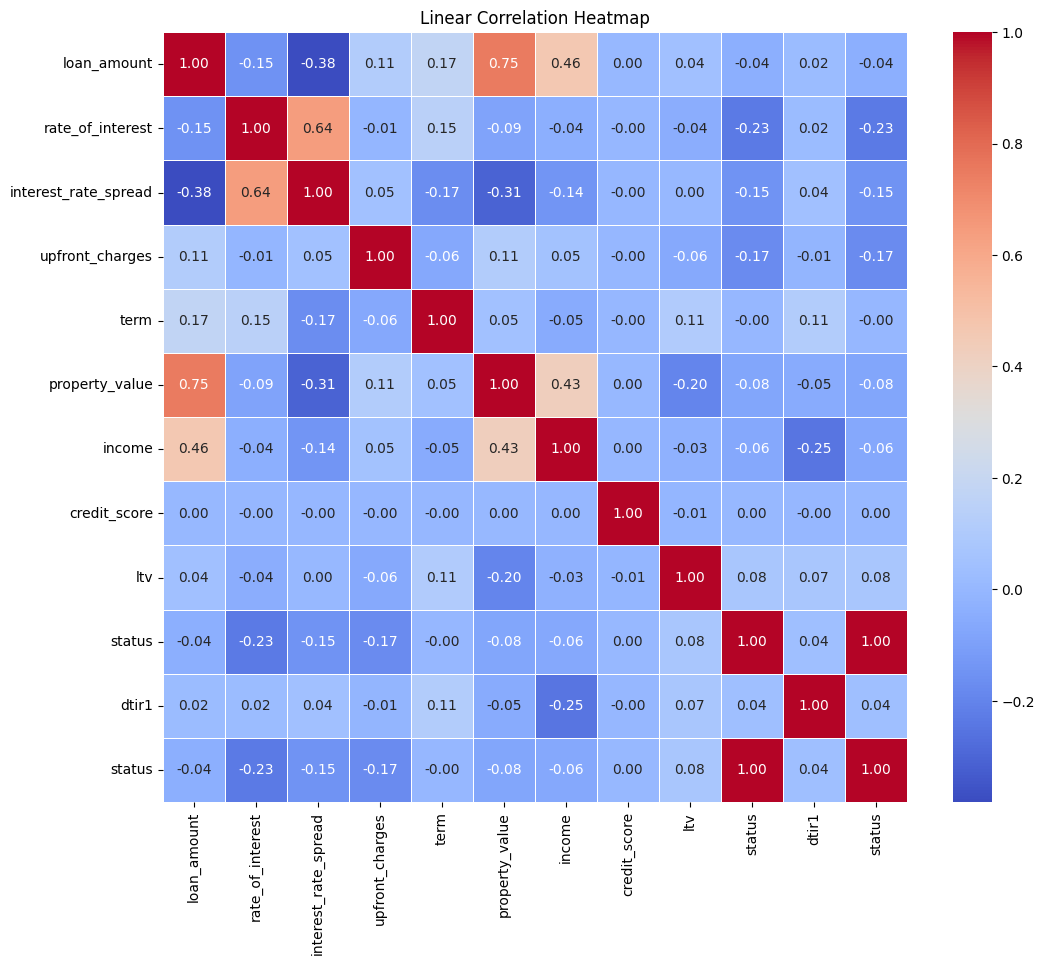

In [16]:
target_variable = 'status'

# Combine numerical columns with the target variable
df_with_target = pd.concat([df[numerical_cols], df[target_variable]], axis=1)

# Calculate the correlation matrix
corr_matrix = df_with_target.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Linear Correlation Heatmap')
plt.show()

# OneHot Encoder

In [17]:
from sklearn.preprocessing import OneHotEncoder
# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(df[categorical_cols])
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(input_features=categorical_cols))
X_encoded.reset_index(drop=True, inplace=True)

# Combine encoded features with numerical columns
X = pd.concat([X_encoded, df[numerical_cols]], axis=1)

C:\Users\Manish\anaconda3\envs\capstone_project\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
X.dtypes

loan_limit_ncf                       float64
gender_Joint                         float64
gender_Male                          float64
gender_Sex Not Available             float64
approv_in_adv_pre                    float64
loan_type_type2                      float64
loan_type_type3                      float64
loan_purpose_p2                      float64
loan_purpose_p3                      float64
loan_purpose_p4                      float64
credit_worthiness_l2                 float64
open_credit_opc                      float64
business_or_commercial_nob/c         float64
neg_ammortization_not_neg            float64
interest_only_not_int                float64
lump_sum_payment_not_lpsm            float64
construction_type_sb                 float64
occupancy_type_pr                    float64
occupancy_type_sr                    float64
secured_by_land                      float64
total_units_2U                       float64
total_units_3U                       float64
total_unit

**Splitting the data in to Train and Test split**

In [19]:
from sklearn.model_selection import train_test_split
# Step 1: Select the selected categorical columns
#selected_categorical_cols = ['age_35-44','age_45-54','age_55-64','age_65-74','age_<25','age_>74', 'gender_Joint','gender_Male','gender_Sex Not Available', 'loan_purpose_p2','loan_purpose_p3','loan_purpose_p4']

numeric_columns = df_imputed.select_dtypes(include='number')
X = numeric_columns.drop(columns=['status'], axis=1)  # Features (predictors)
y = df_imputed['status']  # Target
# Convert 'status' to binary (1 and 0)
y = y.astype(int)
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling

# Random Forrest Classifier

**Random Forest Classifier: 
Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive performance and reduce over fitting. It can be used for both classification and regression tasks. In a Random Forest Classifier, each decision tree in the forest independently predicts the class, and the final prediction is based on a majority vote (classification) or average (regression) of the individual tree predictions.**

**How it works:**

**1)Random Forest builds multiple decision trees by randomly selecting subsets of the data and features (bootstrapping and feature bagging).**

**2)Each decision tree is trained using a random subset of the data and a random subset of features.**

**3)During prediction, the majority vote of all decision trees is taken as the final predicted class.**


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
best_params = {
    'n_estimators': 600,
    'max_depth': 20,
    'min_samples_split': 10,
    'min_samples_leaf': 4,
}

# Initialize the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)

# Train the model on the training data
best_rf_classifier.fit(X_train, y_train)

# Make Predictions on the test data
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     22494
           1       0.93      0.86      0.89      7240

    accuracy                           0.95     29734
   macro avg       0.94      0.92      0.93     29734
weighted avg       0.95      0.95      0.95     29734

Confusion Matrix:
[[21991   503]
 [  990  6250]]


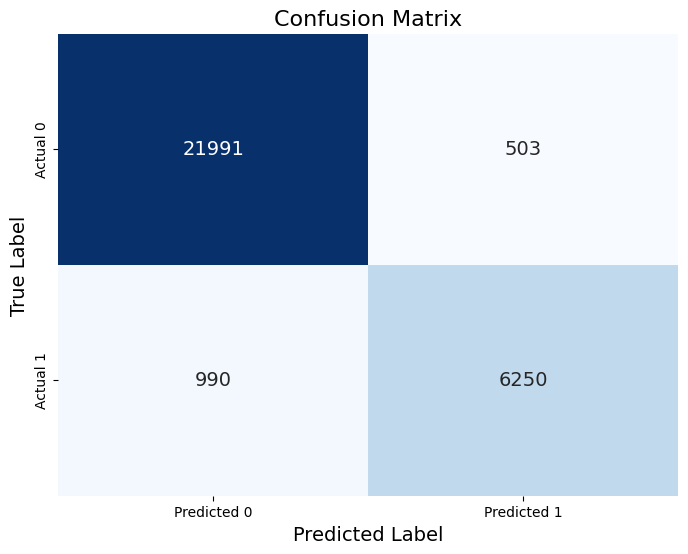

In [21]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={"size": 14}, xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

                Feature  Importance
1      rate_of_interest    0.399642
3       upfront_charges    0.203282
8                   ltv    0.097990
2  interest_rate_spread    0.085075
5        property_value    0.050764
0           loan_amount    0.049239
6                income    0.048421
9                 dtir1    0.036860
7          credit_score    0.016767
4                  term    0.011959


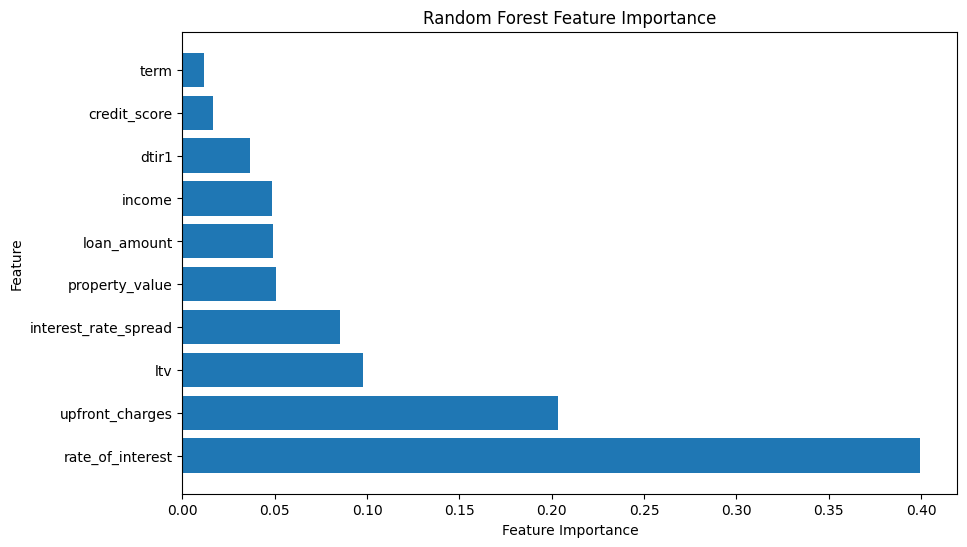

In [22]:
# Get the feature importances from the trained model
feature_importances = best_rf_classifier.feature_importances_

# Create a DataFrame to store the feature importances along with their corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Optionally, you can plot the feature importances for better visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

**The confusion matrix further confirms the model's excellent performance. The model accurately classifies a large number of both non-default cases (true negatives) and loan defaults (true positives). The number of misclassifications is relatively low, with a small number of defaults misclassified as non-defaults (false negatives) and non-defaults misclassified as defaults (false positives).**


# Logistic Regression

**Logistic Regression: Logistic Regression is a type of linear regression used for binary classification tasks, where the goal is to predict a binary outcome (e.g., yes/no, true/false, 0/1). Despite its name, logistic regression is a classification algorithm, not a regression algorithm. It models the probability of the target variable belonging to a particular class using the logistic function, which maps any real-valued number to a value between 0 and 1.**

**How it works:**

**1)Logistic Regression estimates the coefficients for each feature in the data to create a linear model.**

**2)It applies the logistic function (sigmoid function) to the linear combination of the feature values and coefficients to compute the probability of the positive class.**

**3)The probability is then threshold at 0.5 (or a different threshold) to make the final binary prediction.**


In [23]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Create a pipeline with under-sampling and over-sampling steps
pipeline = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('over', SMOTE(random_state=42)),
])

# Fit and resample the training data
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Create the logistic regression classifier with specified hyperparameters
logreg_classifier = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100, random_state=42)

# Train the classifier on the resampled training data
logreg_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_1 = logreg_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_1)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_1))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_1))


Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.54      0.66     22494
           1       0.33      0.69      0.44      7240

    accuracy                           0.58     29734
   macro avg       0.59      0.62      0.55     29734
weighted avg       0.72      0.58      0.61     29734

Confusion Matrix:
[[12165 10329]
 [ 2246  4994]]


**Over all the model failed to predict the defaulters which we can see through the report even after implying hyper parameter tuning and feature engineering**


# XGBoost



 **XGBoost stands for Extreme Gradient Boosting, and it is an optimized gradient boosting algorithm. It is an ensemble learning technique that combines the predictions of multiple weak learners (typically decision trees) to create a strong predictive model. XGBoost is widely used for various machine learning tasks and is known for its high performance and efficiency.**
 
**How it works:**

**1)XGBoost builds multiple decision trees sequentially, with each tree trying to correct the errors of the previous tree.**

**2)It uses gradient boosting to minimize a loss function, such as binary cross-entropy for classification tasks or mean squared error for regression tasks.**

**3)XGBoost employs regularization techniques to prevent over fitting and improve generalization.**


In [24]:

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Initialize the XGBoost classifier with seed and n_jobs
xgb_classifier = xgb.XGBClassifier(seed=42, n_jobs=-1)

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [1000, 1200, 1400],
    'max_depth': [3, 5, 7],    
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_

# Rebuild the model with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(**best_params, seed=42)

# Train the model on the training data
best_xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best = best_xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best Accuracy: {accuracy_best:.2f}')

print('Best Classification Report:')
print(classification_report(y_test, y_pred_best))

print('Best Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_best))

Best Accuracy: 0.99
Best Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22494
           1       0.99      0.96      0.98      7240

    accuracy                           0.99     29734
   macro avg       0.99      0.98      0.98     29734
weighted avg       0.99      0.99      0.99     29734

Best Confusion Matrix:
[[22447    47]
 [  300  6940]]


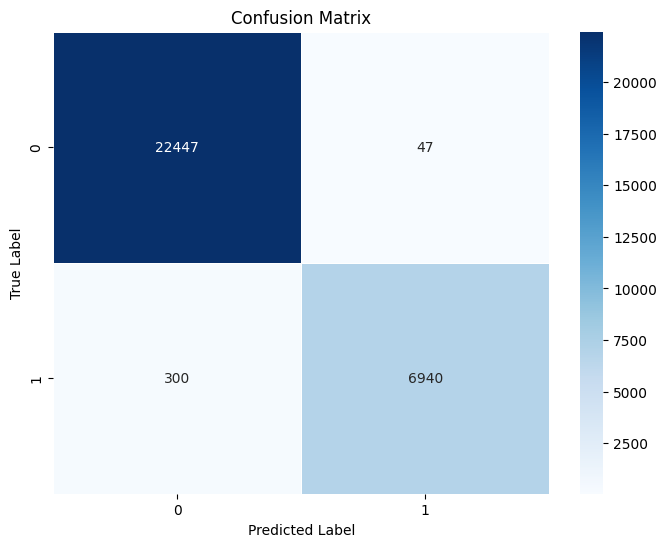

In [25]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

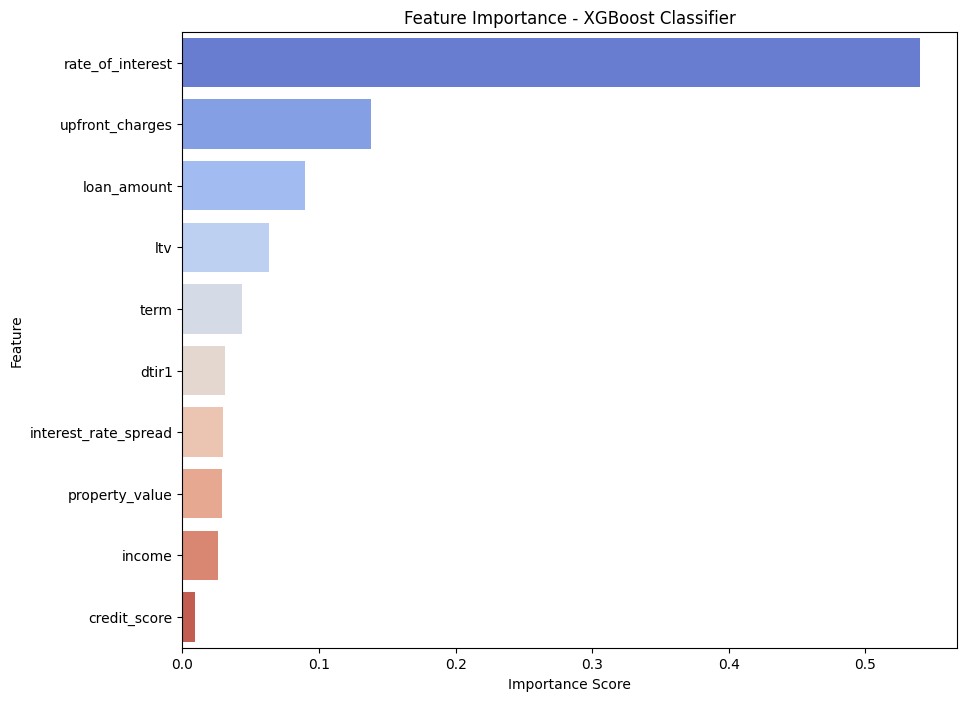

In [26]:
# Get the feature importance scores from the best XGBoost classifier
feature_importance = best_xgb_classifier.feature_importances_

# Create a DataFrame to store feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the features based on their importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance using a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Feature Importance - XGBoost Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

**XGBoost model with hyper parameter tuning has shown remarkable performance. It achieved an accuracy of 99%, which indicates that it is highly accurate in predicting loan default cases.
Best Confusion Matrix: The confusion matrix is a tabular representation of the model's predictions against the actual values.
True Negatives (TN): The model correctly predicted 22,447 non-default cases as non-default.
False Positives (FP): The model incorrectly predicted 47 non-default cases as default.
False Negatives (FN): The model incorrectly predicted 300 default cases as non-default.
True Positives (TP): The model correctly predicted 6,940 default cases as default.**


**A higher importance score for "rate_of_interest" suggests that the interest rate charged on a loan is a crucial factor in determining the default risk. This makes intuitive sense since a higher interest rate could make it more difficult for borrowers to meet their loan obligations, increasing the likelihood of default.**

**As a result, financial institutions and lenders can use this information to make more informed decisions when assessing loan applications. They may consider adjusting interest rates for higher-risk applicants or incorporating the interest rate as a critical factor in their credit risk assessment models to better manage the default risk in their loan portfolios.**

**Overall, the feature importance analysis provides valuable insights into the relative importance of different features in the model's predictions and helps identify the key factors that drive loan default predictions.**

# Now lets do the modelling without the "rate_of_interest" feature

In [27]:

# Drop 'rate_of_interest' feature from the dataset
X_train_xgb = X_train.drop(columns=['rate_of_interest'])
X_test_xgb = X_test.drop(columns=['rate_of_interest'])

In [32]:
# Initialize the XGBoost classifier with specified hyperparameters
xgb_classifier_1 = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=1400,
    max_depth=7,
    nthread=4,
    seed=42
)

# Train the classifier on the training data
xgb_classifier_1.fit(X_train_xgb, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_classifier_1.predict(X_test_xgb)

# Calculate the accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy_xgb:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_xgb))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_xgb))


Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     22494
           1       0.84      0.70      0.77      7240

    accuracy                           0.90     29734
   macro avg       0.88      0.83      0.85     29734
weighted avg       0.89      0.90      0.89     29734

Confusion Matrix:
[[21538   956]
 [ 2148  5092]]


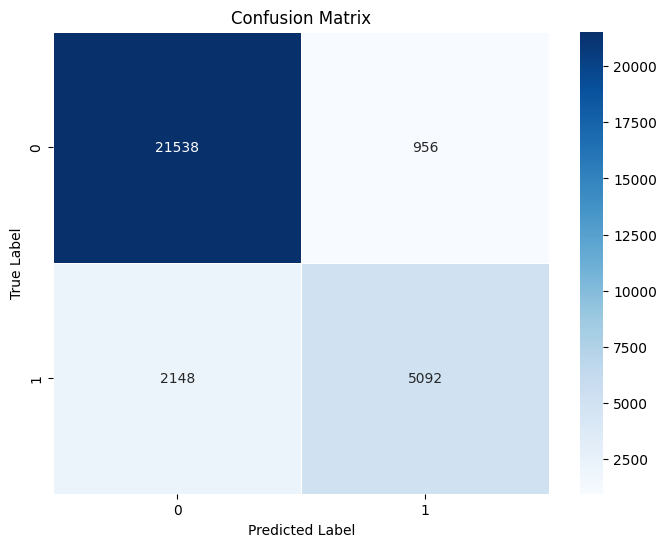

In [35]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

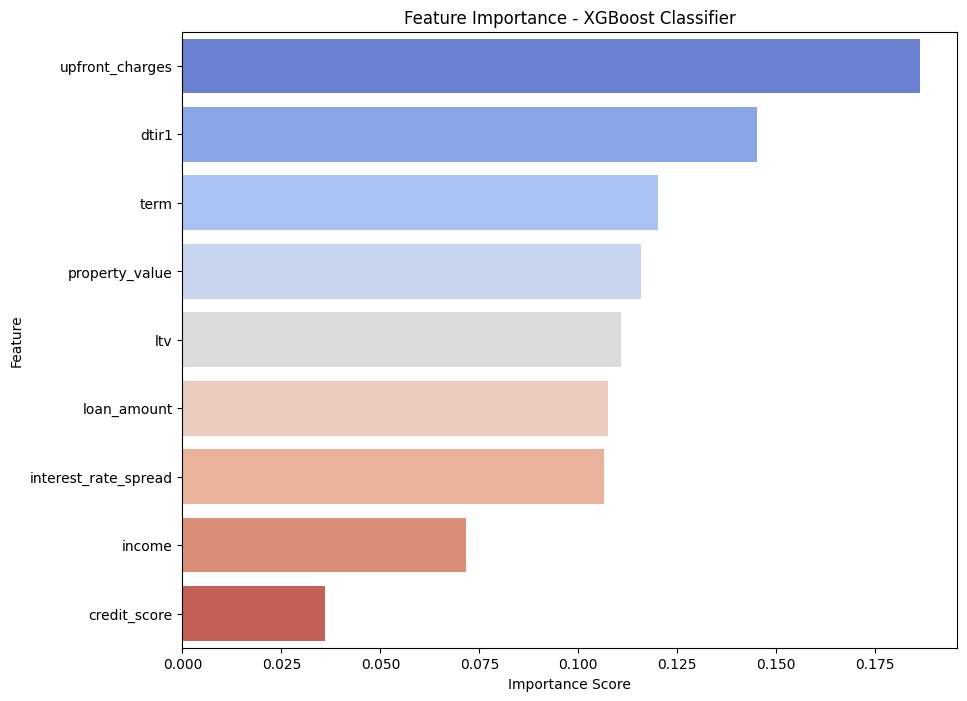

In [33]:
feature_importance_1 = xgb_classifier_1.feature_importances_

# Create a DataFrame to store feature names and their corresponding importance scores
feature_importance_df_2 = pd.DataFrame({'Feature': X_train_xgb.columns, 'Importance': feature_importance_1})

# Sort the features based on their importance scores in descending order
feature_importance_df_3 = feature_importance_df_2.sort_values(by='Importance', ascending=False)

# Plot the feature importance using a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_3, palette='coolwarm')
plt.title('Feature Importance - XGBoost Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [34]:
# Get feature importance scores
feature_importance_scores = xgb_classifier.feature_importances_

# Create a DataFrame to store feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train_xgb.columns, 'Importance': feature_importance_scores})

# Sort the features based on their importance scores in descending order
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importance DataFrame
print(feature_importance_df_sorted)

                Feature  Importance
2       upfront_charges    0.186443
8                 dtir1    0.145218
3                  term    0.120011
4        property_value    0.115775
7                   ltv    0.110675
0           loan_amount    0.107462
1  interest_rate_spread    0.106567
5                income    0.071761
6          credit_score    0.036088


**Conclusion:**

**However after dropping the "rate_of_interest".The model's reliance on other features, such as "upfront_charges," "dtir1," and others, suggests that these factors have become more influential in determining loan default status.**

**In conclusion, the model's performance with the updated feature set shows promising results. The accuracy of approximately 90% suggests that the model is effective in distinguishing between loan default and non-default cases. The precision and recall scores indicate a balanced trade-off between correctly identifying positive cases (default) and negative cases (non-default).**

